In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_jan = pd.read_csv("Jan23_Feb7_data.csv")
#timestamp column to datetime 
df_jan['timestamp'] = pd.to_datetime(df_jan['timestamp'])
df_jan = df_jan.resample('H', on ='timestamp', axis=0).mean()
df_jan.head()


Chan_0_1   Chan_0_2   Chan_1_2
timestamp                                           
2024-01-23 14:00:00  44.538462  32.076923  51.076923
2024-01-23 15:00:00  47.066667  32.316667  50.083333
2024-01-23 16:00:00  46.850000  32.833333  50.733333
2024-01-23 17:00:00  45.450000  32.233333  49.616667
2024-01-23 18:00:00  45.683333  32.600000  49.816667

In [4]:
df_weather = pd.read_csv("AW_Jan22_Feb7.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').mean()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_jan, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

Chan_0_1   Chan_0_2   Chan_1_2  Outdoor_Temperature  \
timestamp                                                                   
2024-01-23 14:00:00  44.538462  32.076923  51.076923            50.525000   
2024-01-23 15:00:00  47.066667  32.316667  50.083333            51.033333   
2024-01-23 16:00:00  46.850000  32.833333  50.733333            50.958333   
2024-01-23 17:00:00  45.450000  32.233333  49.616667            50.791667   
2024-01-23 18:00:00  45.683333  32.600000  49.816667            50.066667   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-01-23 14:00:00    0.141667   0.550000            12.5      160.833333   
2024-01-23 15:00:00    0.583333   0.916667            12.5       71.666667   
2024-01-23 16:00:00    0.908333   1.383333            12.5       89.083333   
2024-01-23 17:00:00    1.316667   2.150000            12.5      122.500000   
2024-01-23 18:00:00    0.725000   1.383333            12.5      130.000000   

                     Hourly_Rain  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                               
2024-01-23 14:00:00          0.0        0.06        0.06         0.06   
2024-01-23 15:00:00          0.0        0.06        0.06         0.06   
2024-01-23 16:00:00          0.0        0.06        0.06         0.06   
2024-01-23 17:00:00          0.0        0.06        0.06         0.06   
2024-01-23 18:00:00          0.0        0.06        0.06         0.06   

                     Monthly_Rain  Total_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                 
2024-01-23 14:00:00          5.33       71.92                 30.268333   
2024-01-23 15:00:00          5.33       71.92                 30.269167   
2024-01-23 16:00:00          5.33       71.92                 30.266667   
2024-01-23 17:00:00          5.33       71.92                 30.263333   
2024-01-23 18:00:00          5.33       71.92                 30.266667   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-01-23 14:00:00     85.916667                           0.0   
2024-01-23 15:00:00     85.416667                           0.0   
2024-01-23 16:00:00     85.833333                           0.0   
2024-01-23 17:00:00     85.416667                           0.0   
2024-01-23 18:00:00     86.833333                           0.0   

                     Solar_Radiation_(W/m^2)  Absolute_Pressure  CO2_battery  
timestamp                                                                     
2024-01-23 14:00:00                72.400000          29.304167          1.0  
2024-01-23 15:00:00                47.875000          29.302500          1.0  
2024-01-23 16:00:00                38.716667          29.304167          1.0  
2024-01-23 17:00:00                11.833333          29.299167          1.0  
2024-01-23 18:00:00                 0.175000          29.303333          1.0

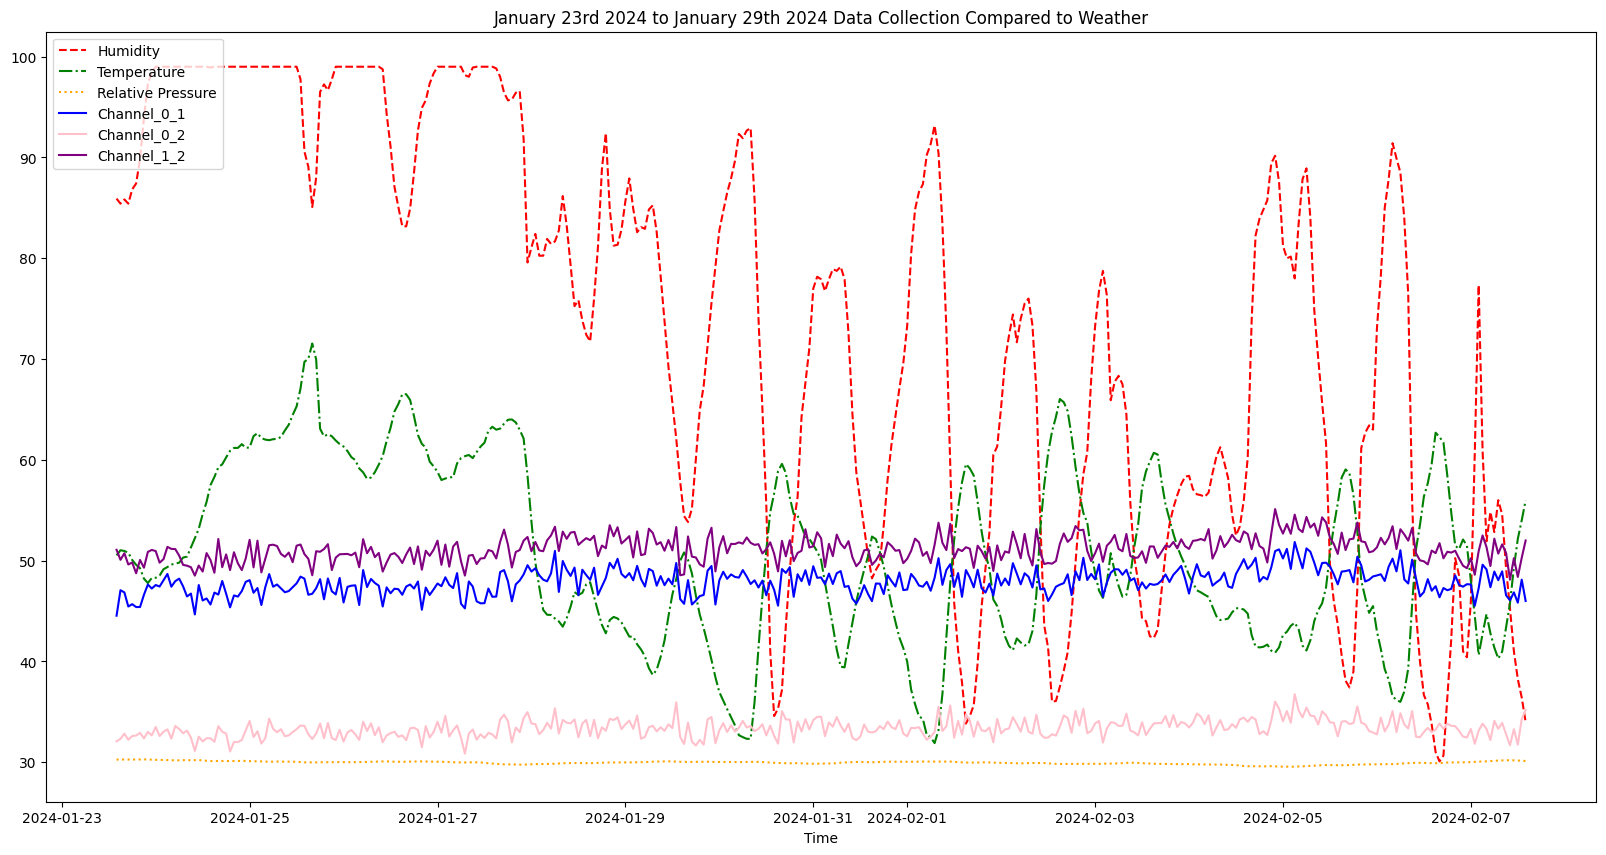

In [5]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


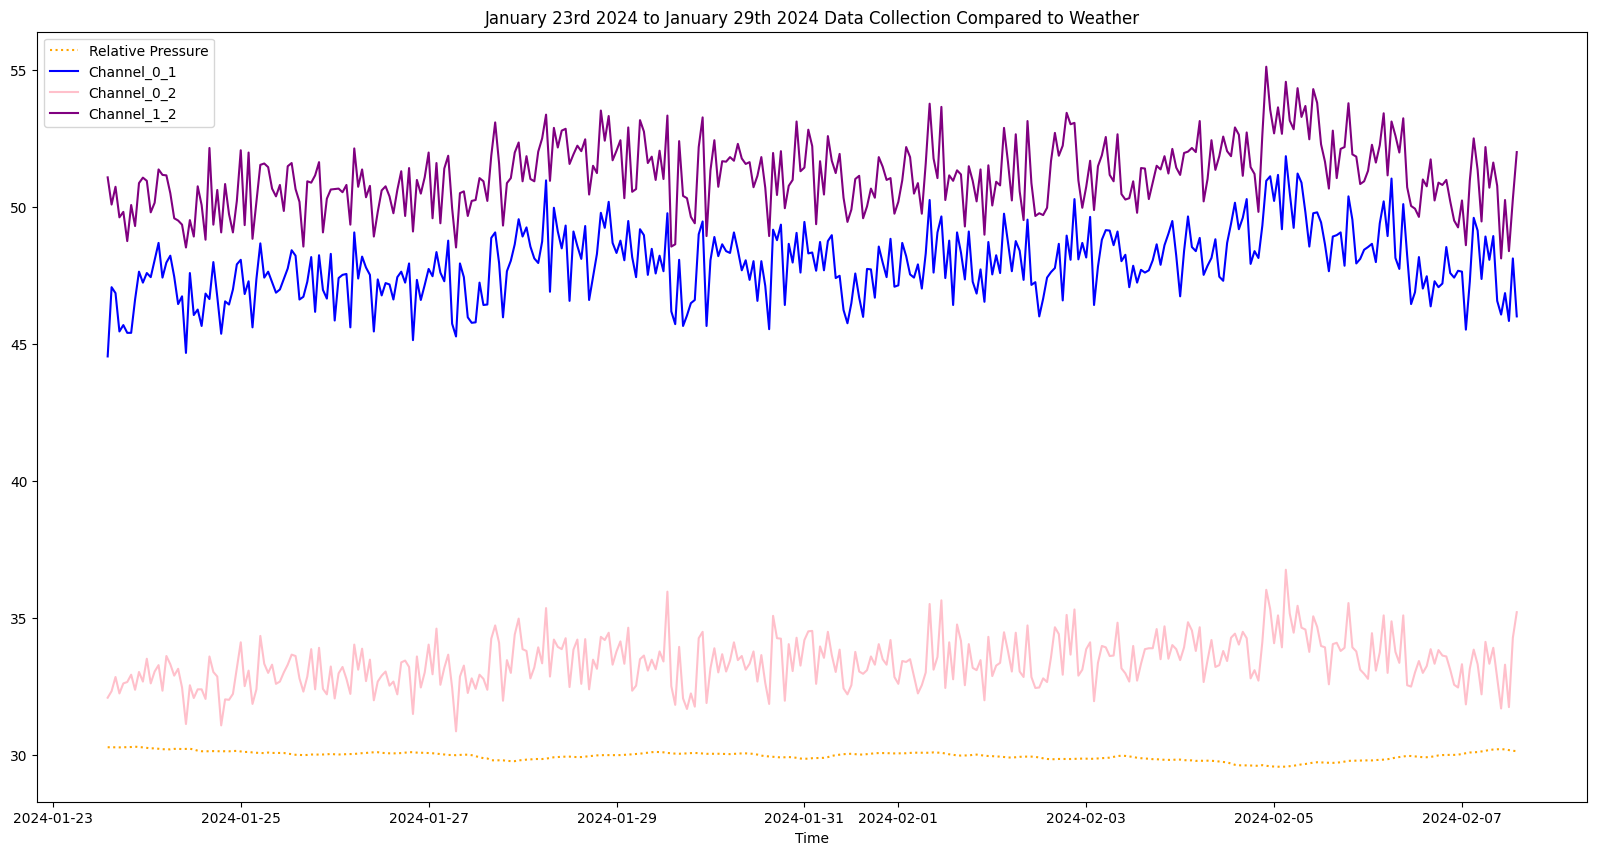

In [6]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


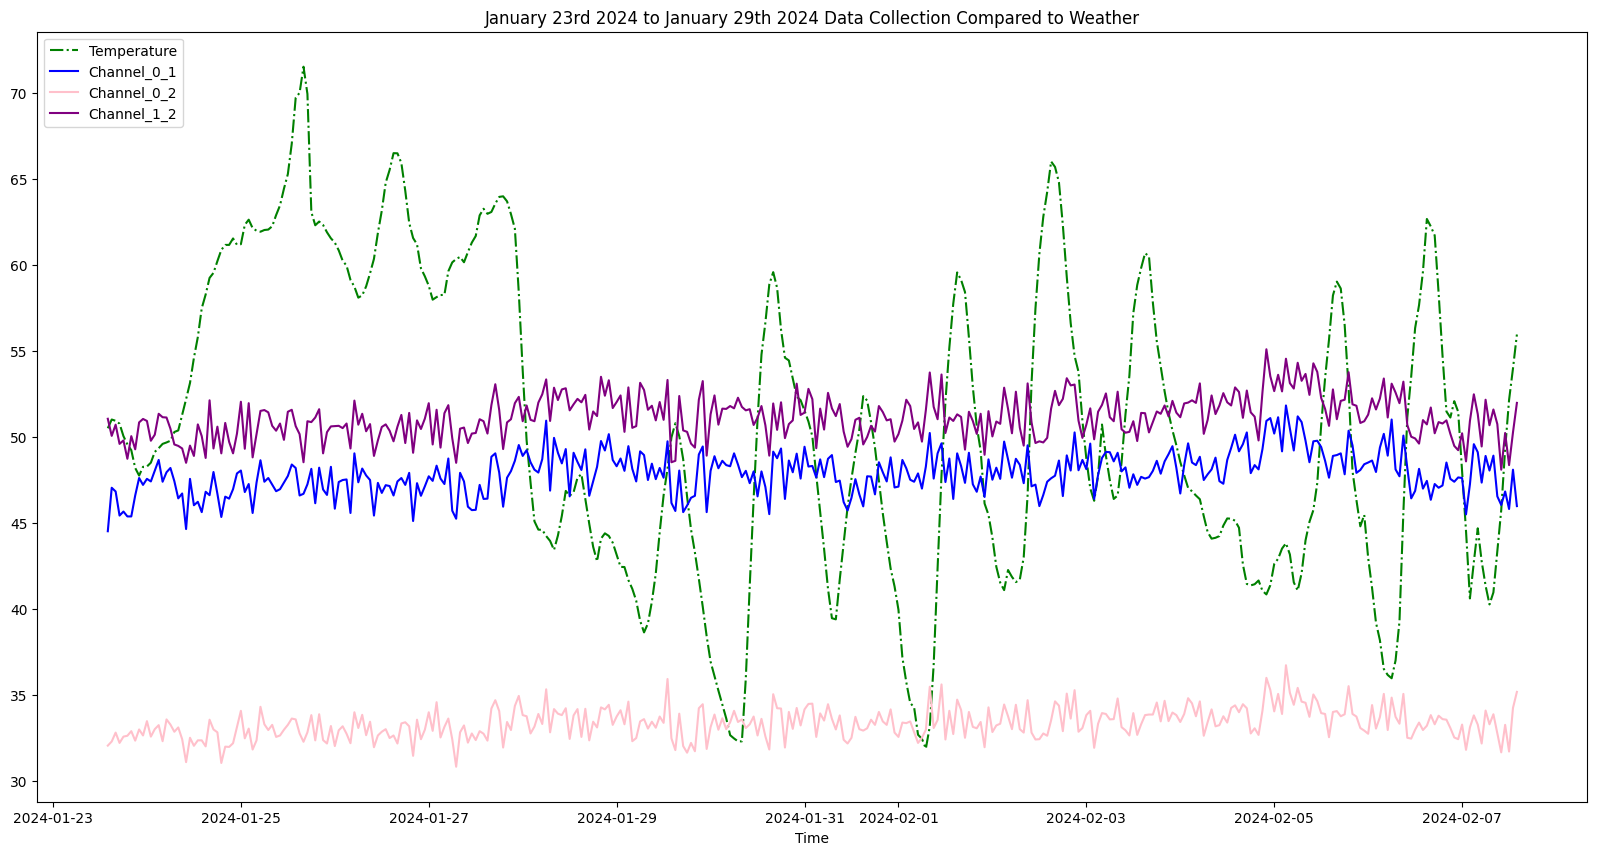

In [7]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


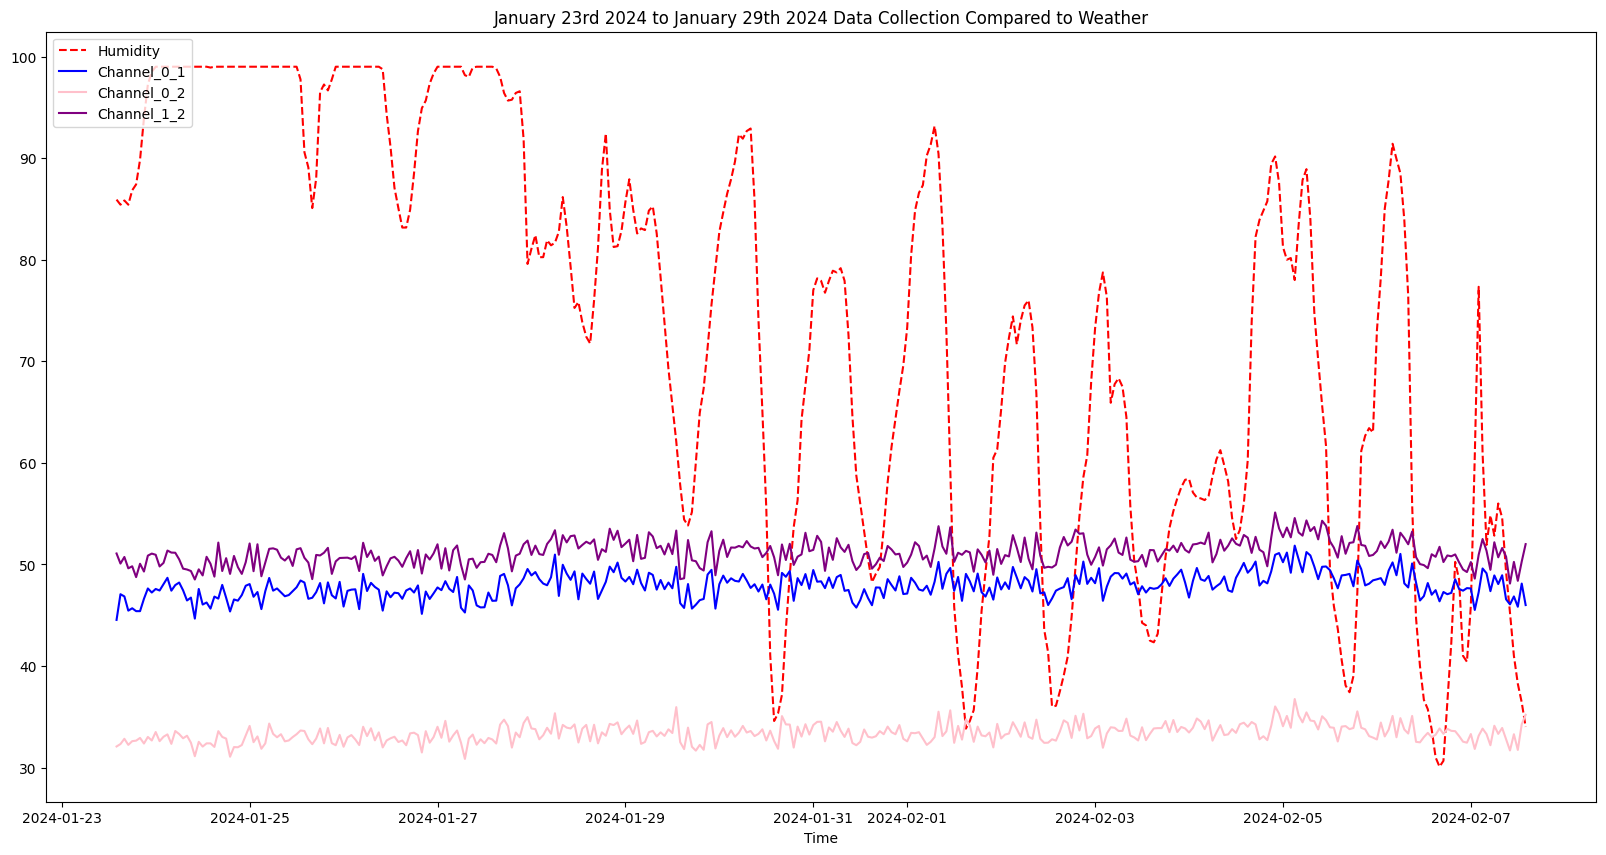

In [8]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [9]:
from sklearn.preprocessing import MinMaxScaler
df_copy = df_combined.copy()
#min max scaler
scaler = MinMaxScaler()
#fit the scaler to the data
scaler.fit(df_copy)
#transform the data
scaled_data = scaler.transform(df_copy)
#convert the scaled data to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns, index=df_copy.index)
df_scaled.head()

Chan_0_1  Chan_0_2  Chan_1_2  Outdoor_Temperature  \
timestamp                                                                
2024-01-23 14:00:00  0.000000  0.207953  0.422894             0.469834   
2024-01-23 15:00:00  0.345783  0.248588  0.280952             0.482657   
2024-01-23 16:00:00  0.316149  0.336158  0.373810             0.480765   
2024-01-23 17:00:00  0.124671  0.234463  0.214286             0.476561   
2024-01-23 18:00:00  0.156584  0.296610  0.242857             0.458272   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-01-23 14:00:00    0.025526   0.074492        0.726744        0.473168   
2024-01-23 15:00:00    0.105105   0.124153        0.726744        0.197110   
2024-01-23 16:00:00    0.163664   0.187359        0.726744        0.251032   
2024-01-23 17:00:00    0.237237   0.291196        0.726744        0.354489   
2024-01-23 18:00:00    0.130631   0.187359        0.726744        0.377709   

                     Hourly_Rain  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                               
2024-01-23 14:00:00          0.0    0.041096    0.050847     0.031088   
2024-01-23 15:00:00          0.0    0.041096    0.050847     0.031088   
2024-01-23 16:00:00          0.0    0.041096    0.050847     0.031088   
2024-01-23 17:00:00          0.0    0.041096    0.050847     0.031088   
2024-01-23 18:00:00          0.0    0.041096    0.050847     0.031088   

                     Monthly_Rain  Total_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                 
2024-01-23 14:00:00      0.740278         0.0                  0.970421   
2024-01-23 15:00:00      0.740278         0.0                  0.971559   
2024-01-23 16:00:00      0.740278         0.0                  0.968146   
2024-01-23 17:00:00      0.740278         0.0                  0.963595   
2024-01-23 18:00:00      0.740278         0.0                  0.968146   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-01-23 14:00:00      0.810157                           0.0   
2024-01-23 15:00:00      0.802902                           0.0   
2024-01-23 16:00:00      0.808948                           0.0   
2024-01-23 17:00:00      0.802902                           0.0   
2024-01-23 18:00:00      0.823458                           0.0   

                     Solar_Radiation_(W/m^2)  Absolute_Pressure  CO2_battery  
timestamp                                                                     
2024-01-23 14:00:00                 0.206263           0.971655          0.0  
2024-01-23 15:00:00                 0.136393           0.969388          0.0  
2024-01-23 16:00:00                 0.110301           0.971655          0.0  
2024-01-23 17:00:00                 0.033712           0.964853          0.0  
2024-01-23 18:00:00                 0.000499           0.970522          0.0

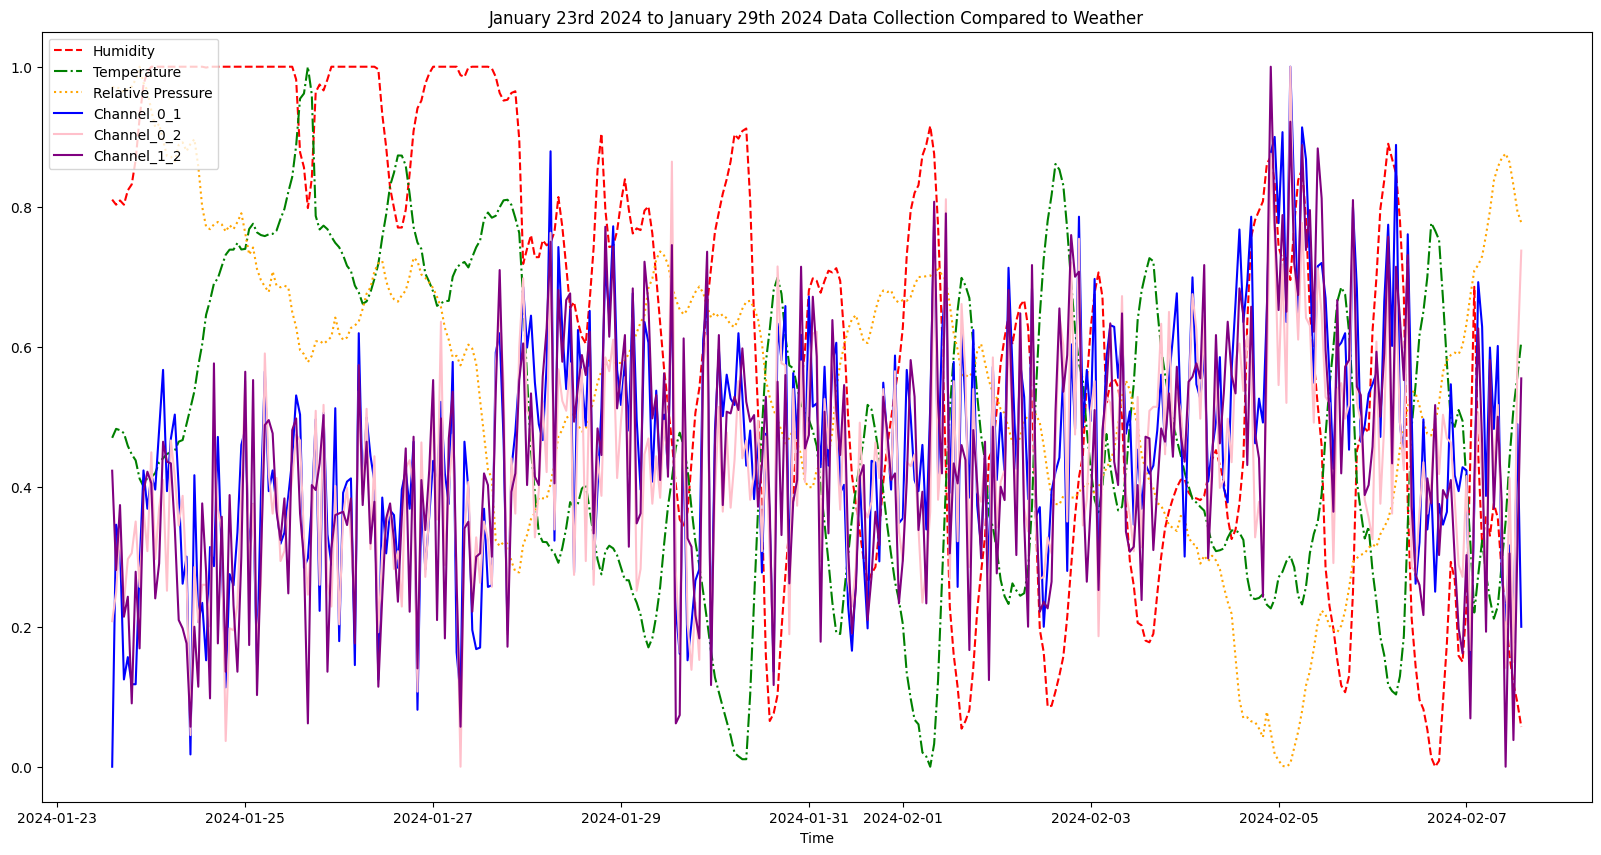

In [10]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

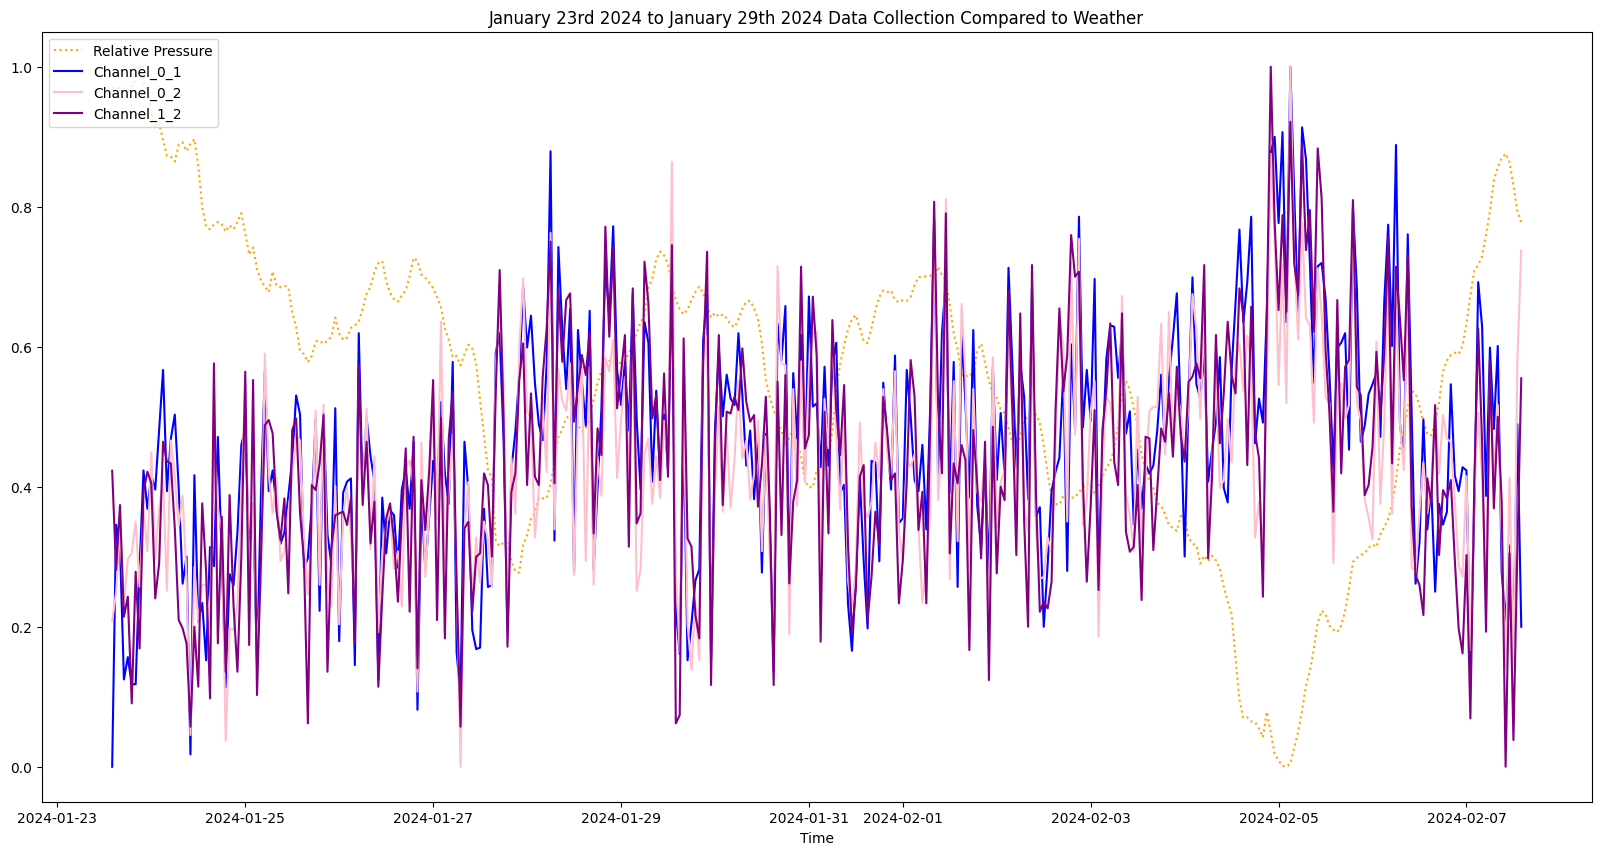

In [11]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

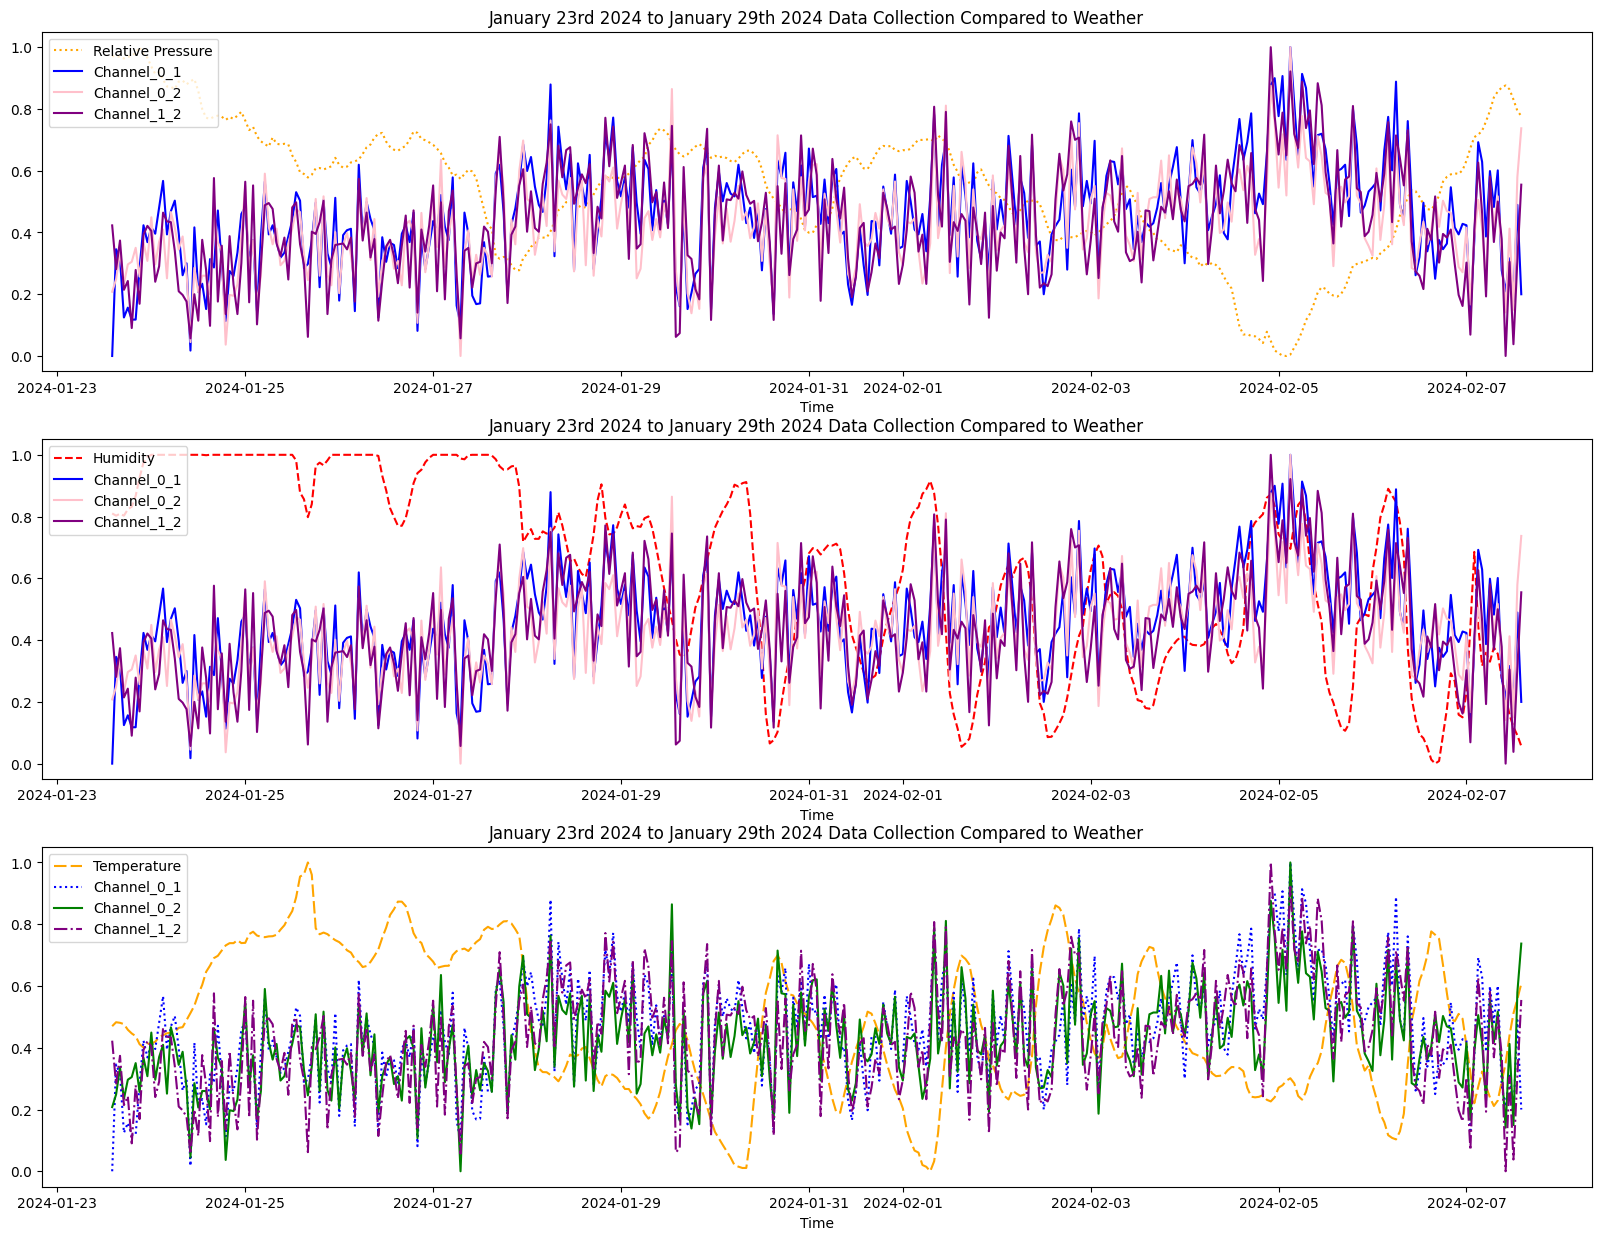

In [12]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax2.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax2.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax2.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax2.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax2.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax3.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax3.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax3.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled.index, df_scaled['Chan_0_2'], color='green')
ax3.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [13]:
#make zero mean and unit variance
df_scaled_zmuv = df_combined.copy()
df_scaled_zmuv['Chan_0_1'] = (df_scaled_zmuv['Chan_0_1'] - df_scaled_zmuv['Chan_0_1'].mean()) / df_scaled_zmuv['Chan_0_1'].std()
df_scaled_zmuv['Chan_0_2'] = (df_scaled_zmuv['Chan_0_2'] - df_scaled_zmuv['Chan_0_2'].mean()) / df_scaled_zmuv['Chan_0_2'].std()
df_scaled_zmuv['Chan_1_2'] = (df_scaled_zmuv['Chan_1_2'] - df_scaled_zmuv['Chan_1_2'].mean()) / df_scaled_zmuv['Chan_1_2'].std()
df_scaled_zmuv['Humidity_(%)'] = (df_scaled_zmuv['Humidity_(%)'] - df_scaled_zmuv['Humidity_(%)'].mean()) / df_scaled_zmuv['Humidity_(%)'].std()
df_scaled_zmuv['Outdoor_Temperature'] = (df_scaled_zmuv['Outdoor_Temperature'] - df_scaled_zmuv['Outdoor_Temperature'].mean()) / df_scaled_zmuv['Outdoor_Temperature'].std()
df_scaled_zmuv['Relative_Pressure_(inHg)'] = (df_scaled_zmuv['Relative_Pressure_(inHg)'] - df_scaled_zmuv['Relative_Pressure_(inHg)'].mean()) / df_scaled_zmuv['Relative_Pressure_(inHg)'].std()
df_scaled_zmuv.head()

Chan_0_1  Chan_0_2  Chan_1_2  Outdoor_Temperature  \
timestamp                                                                
2024-01-23 14:00:00 -2.688721 -1.445137 -0.065289            -0.023236   
2024-01-23 15:00:00 -0.666410 -1.178556 -0.865702             0.034303   
2024-01-23 16:00:00 -0.839722 -0.604053 -0.342077             0.025814   
2024-01-23 17:00:00 -1.959582 -1.271218 -1.241638             0.006949   
2024-01-23 18:00:00 -1.772938 -0.863506 -1.080522            -0.075115   

                     Wind_Speed  Wind_Gust  Max_Daily_Gust  Wind_Direction  \
timestamp                                                                    
2024-01-23 14:00:00    0.141667   0.550000            12.5      160.833333   
2024-01-23 15:00:00    0.583333   0.916667            12.5       71.666667   
2024-01-23 16:00:00    0.908333   1.383333            12.5       89.083333   
2024-01-23 17:00:00    1.316667   2.150000            12.5      122.500000   
2024-01-23 18:00:00    0.725000   1.383333            12.5      130.000000   

                     Hourly_Rain  Event_Rain  Daily_Rain  Weekly_Rain  \
timestamp                                                               
2024-01-23 14:00:00          0.0        0.06        0.06         0.06   
2024-01-23 15:00:00          0.0        0.06        0.06         0.06   
2024-01-23 16:00:00          0.0        0.06        0.06         0.06   
2024-01-23 17:00:00          0.0        0.06        0.06         0.06   
2024-01-23 18:00:00          0.0        0.06        0.06         0.06   

                     Monthly_Rain  Total_Rain  Relative_Pressure_(inHg)  \
timestamp                                                                 
2024-01-23 14:00:00          5.33       71.92                  2.043286   
2024-01-23 15:00:00          5.33       71.92                  2.048725   
2024-01-23 16:00:00          5.33       71.92                  2.032407   
2024-01-23 17:00:00          5.33       71.92                  2.010651   
2024-01-23 18:00:00          5.33       71.92                  2.032407   

                     Humidity_(%)  Ultra-Violet_Radiation_Index  \
timestamp                                                         
2024-01-23 14:00:00      0.588794                           0.0   
2024-01-23 15:00:00      0.564554                           0.0   
2024-01-23 16:00:00      0.584754                           0.0   
2024-01-23 17:00:00      0.564554                           0.0   
2024-01-23 18:00:00      0.633234                           0.0   

                     Solar_Radiation_(W/m^2)  Absolute_Pressure  CO2_battery  
timestamp                                                                     
2024-01-23 14:00:00                72.400000          29.304167          1.0  
2024-01-23 15:00:00                47.875000          29.302500          1.0  
2024-01-23 16:00:00                38.716667          29.304167          1.0  
2024-01-23 17:00:00                11.833333          29.299167          1.0  
2024-01-23 18:00:00                 0.175000          29.303333          1.0

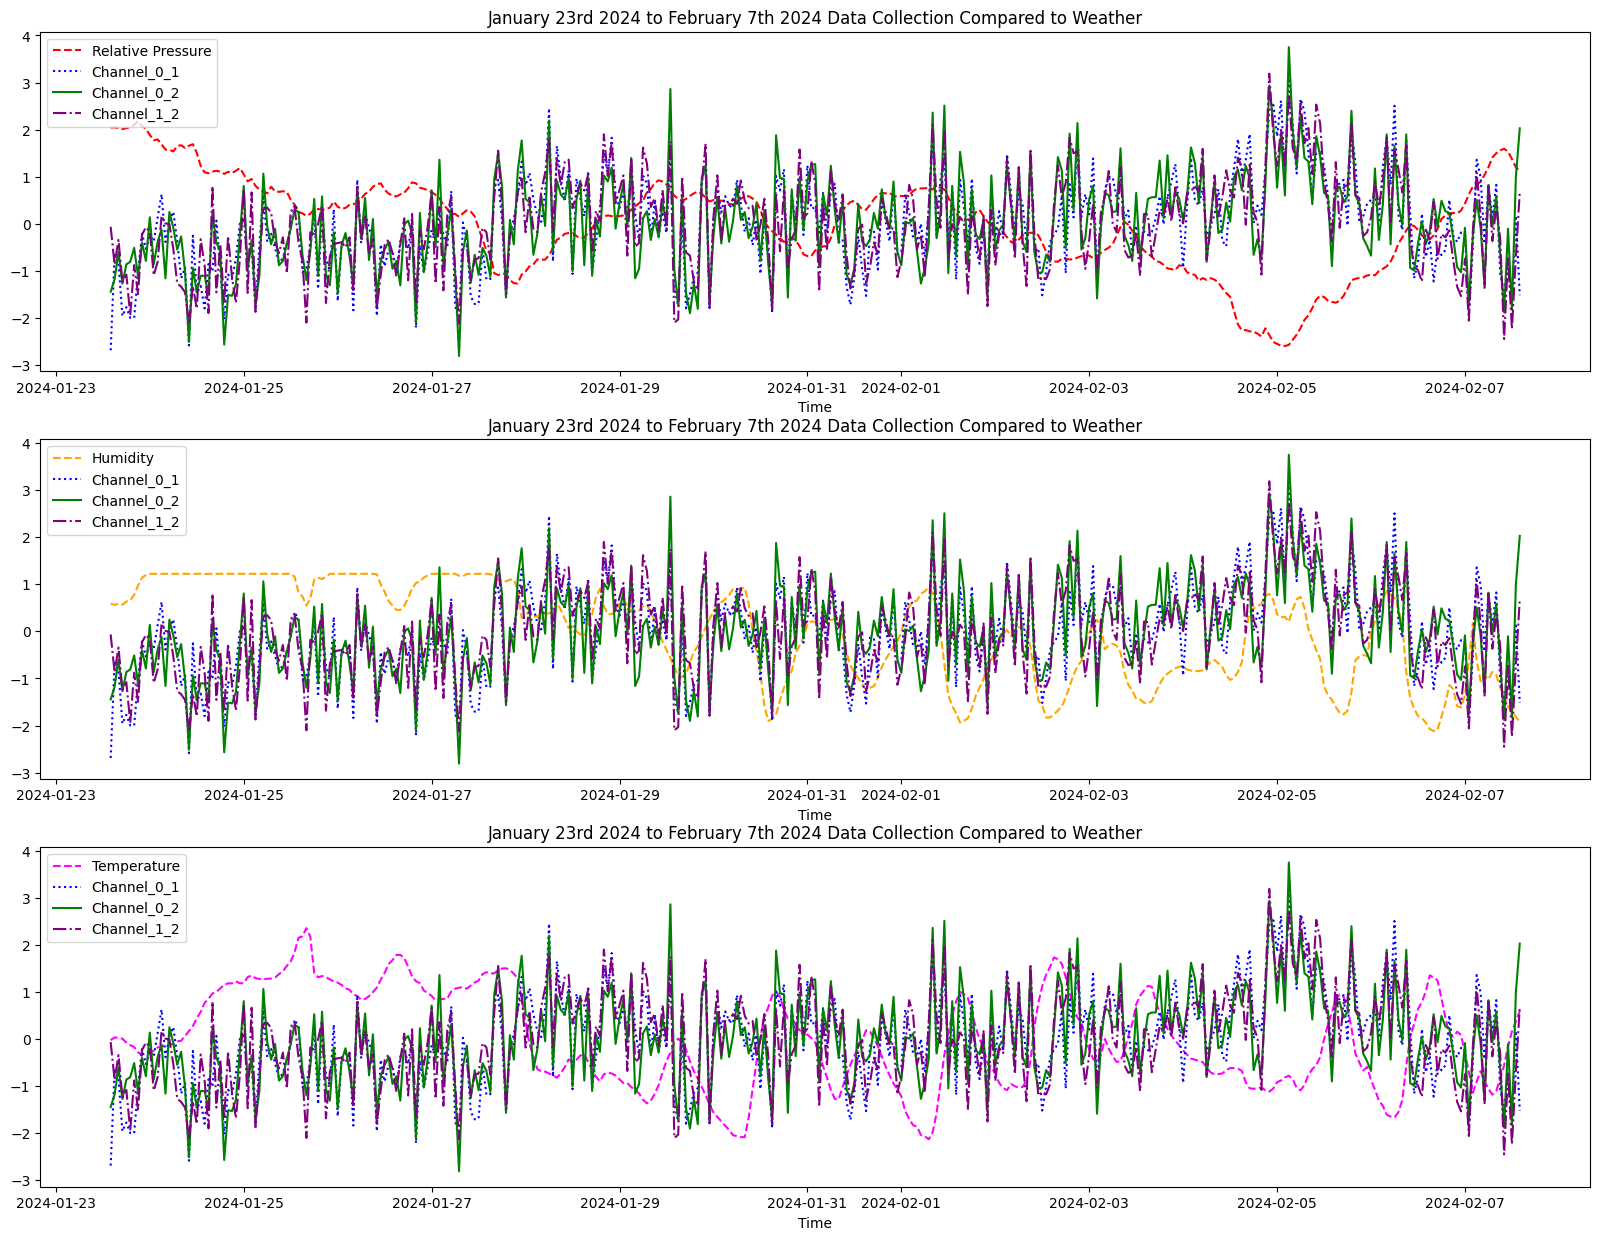

In [14]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))
ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#plot humidity on the second axis
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')

ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


Percent scale 

In [15]:
#import the countries data from the csv file with an index column of countries
df_cubesat_updated = pd.read_csv("Jan23_Feb7_data.csv")
#timestamp column to datetime 
df_cubesat_updated['timestamp'] = pd.to_datetime(df_cubesat_updated['timestamp'])
df_cubesat_updated = df_cubesat_updated.resample('H', on ='timestamp', axis=0).sum()
# df_cubesat = df_ground.resample('H', on ='timestamp', axis=0).mean()
df_cubesat_updated.head()

Chan_0_1  Chan_0_2  Chan_1_2
timestamp                                        
2024-01-23 14:00:00       579       417       664
2024-01-23 15:00:00      2824      1939      3005
2024-01-23 16:00:00      2811      1970      3044
2024-01-23 17:00:00      2727      1934      2977
2024-01-23 18:00:00      2741      1956      2989

In [16]:
df_cubesat_updated["Chan_0_1_pct"] = ((df_cubesat_updated['Chan_0_1'] - df_cubesat_updated['Chan_0_1'].mean())/ 
                    df_cubesat_updated['Chan_0_1'].mean()*100)
df_cubesat_updated["Chan_0_2_pct"] = ((df_cubesat_updated['Chan_0_2'] - df_cubesat_updated['Chan_0_2'].mean())/ 
                    df_cubesat_updated['Chan_0_2'].mean()*100)
df_cubesat_updated["Chan_1_2_pct"] = ((df_cubesat_updated['Chan_1_2'] - df_cubesat_updated['Chan_1_2'].mean())/ 
                    df_cubesat_updated['Chan_1_2'].mean()*100)
df_cubesat_updated["Chan_0_1_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_1_pct.mean()
df_cubesat_updated["Chan_0_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_0_2_pct.mean()
df_cubesat_updated["Chan_1_2_m_avg"] = df_cubesat_updated.rolling('12H').Chan_1_2_pct.mean()

df_cubesat_updated.head()

#remove first and last line of data
df_cubesat_updated = df_cubesat_updated.iloc[1:]
df_cubesat_updated = df_cubesat_updated.iloc[:-1]

In [17]:
df_weather = pd.read_csv("AW_Jan22_Feb7.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').sum()
# df_weather = df_weather.resample('H').sum()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined3 = pd.concat([df_cubesat_updated, df_weather], axis=1, join='outer')
df_combined3.dropna(inplace=True)
df_combined3.head()

Chan_0_1  Chan_0_2  Chan_1_2  Chan_0_1_pct  Chan_0_2_pct  \
timestamp                                                                       
2024-01-23 15:00:00    2824.0    1939.0    3005.0     -1.299466     -2.712188   
2024-01-23 16:00:00    2811.0    1970.0    3044.0     -1.753824     -1.156787   
2024-01-23 17:00:00    2727.0    1934.0    2977.0     -4.689675     -2.963059   
2024-01-23 18:00:00    2741.0    1956.0    2989.0     -4.200367     -1.859226   
2024-01-23 19:00:00    2724.0    1959.0    2925.0     -4.794527     -1.708703   

                     Chan_1_2_pct  Chan_0_1_m_avg  Chan_0_2_m_avg  \
timestamp                                                           
2024-01-23 15:00:00     -1.633629      -40.531530      -40.894769   
2024-01-23 16:00:00     -0.356994      -27.605628      -27.648775   
2024-01-23 17:00:00     -2.550187      -21.876640      -21.477346   
2024-01-23 18:00:00     -2.157376      -18.341385      -17.553722   
2024-01-23 19:00:00     -4.252367      -16.083576      -14.912885   

                     Chan_1_2_m_avg  Outdoor_Temperature  ...  Daily_Rain  \
timestamp                                                 ...               
2024-01-23 15:00:00      -39.949049                612.4  ...        0.72   
2024-01-23 16:00:00      -26.751697                611.5  ...        0.72   
2024-01-23 17:00:00      -20.701320                609.5  ...        0.72   
2024-01-23 18:00:00      -16.992531                600.8  ...        0.72   
2024-01-23 19:00:00      -14.869170                595.1  ...        0.72   

                     Weekly_Rain  Monthly_Rain  Total_Rain  \
timestamp                                                    
2024-01-23 15:00:00         0.72         63.96      863.04   
2024-01-23 16:00:00         0.72         63.96      863.04   
2024-01-23 17:00:00         0.72         63.96      863.04   
2024-01-23 18:00:00         0.72         63.96      863.04   
2024-01-23 19:00:00         0.72         63.96      863.04   

                     Relative_Pressure_(inHg)  Humidity_(%)  \
timestamp                                                     
2024-01-23 15:00:00                    363.23          1025   
2024-01-23 16:00:00                    363.20          1030   
2024-01-23 17:00:00                    363.16          1025   
2024-01-23 18:00:00                    363.20          1042   
2024-01-23 19:00:00                    363.23          1049   

                     Ultra-Violet_Radiation_Index  Solar_Radiation_(W/m^2)  \
timestamp                                                                    
2024-01-23 15:00:00                             0                    574.5   
2024-01-23 16:00:00                             0                    464.6   
2024-01-23 17:00:00                             0                    142.0   
2024-01-23 18:00:00                             0                      2.1   
2024-01-23 19:00:00                             0                      0.0   

                     Absolute_Pressure  CO2_battery  
timestamp                                            
2024-01-23 15:00:00             351.63           12  
2024-01-23 16:00:00             351.65           12  
2024-01-23 17:00:00             351.59           12  
2024-01-23 18:00:00             351.64           12  
2024-01-23 19:00:00             351.66           12  

[5 rows x 26 columns]

In [18]:
#scale temperature by the percent change
df_combined3['Temperature_F_pct'] = ((df_combined3['Outdoor_Temperature'] - df_combined3['Outdoor_Temperature'].mean())/ 
                    df_combined3['Outdoor_Temperature'].mean()*100)
#scale by 0.1
df_combined3['Temperature_F_pct'] = df_combined3['Temperature_F_pct'] * 0.1

#scale relative pressure the same way 
#pressure_mean = df_combined3['Relative_Pressure_(inHg)'].sum()
df_combined3['Relative_Pressure_pct'] = ((df_combined3['Relative_Pressure_(inHg)'] - df_combined3['Relative_Pressure_(inHg)'].mean())/ 
                    df_combined3['Relative_Pressure_(inHg)'].mean()*100)
#multiply each line in Relative_Pressure_pct by 2
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'] * 2

#filter any Relative_Pressure_pct values that are less than -10 and replace them with average
#df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].mask(df_combined3['Relative_Pressure_pct'] < -10, df_combined3['Relative_Pressure_pct'].mean())

#replace any Relative_Pressure_pct values that are less than -10 with the average of the column
df_combined3['Relative_Pressure_pct'] = df_combined3['Relative_Pressure_pct'].apply(lambda x: x if x > -10 else df_combined3['Relative_Pressure_pct'].mean())

df_combined3.head()

Chan_0_1  Chan_0_2  Chan_1_2  Chan_0_1_pct  Chan_0_2_pct  \
timestamp                                                                       
2024-01-23 15:00:00    2824.0    1939.0    3005.0     -1.299466     -2.712188   
2024-01-23 16:00:00    2811.0    1970.0    3044.0     -1.753824     -1.156787   
2024-01-23 17:00:00    2727.0    1934.0    2977.0     -4.689675     -2.963059   
2024-01-23 18:00:00    2741.0    1956.0    2989.0     -4.200367     -1.859226   
2024-01-23 19:00:00    2724.0    1959.0    2925.0     -4.794527     -1.708703   

                     Chan_1_2_pct  Chan_0_1_m_avg  Chan_0_2_m_avg  \
timestamp                                                           
2024-01-23 15:00:00     -1.633629      -40.531530      -40.894769   
2024-01-23 16:00:00     -0.356994      -27.605628      -27.648775   
2024-01-23 17:00:00     -2.550187      -21.876640      -21.477346   
2024-01-23 18:00:00     -2.157376      -18.341385      -17.553722   
2024-01-23 19:00:00     -4.252367      -16.083576      -14.912885   

                     Chan_1_2_m_avg  Outdoor_Temperature  ...  Monthly_Rain  \
timestamp                                                 ...                 
2024-01-23 15:00:00      -39.949049                612.4  ...         63.96   
2024-01-23 16:00:00      -26.751697                611.5  ...         63.96   
2024-01-23 17:00:00      -20.701320                609.5  ...         63.96   
2024-01-23 18:00:00      -16.992531                600.8  ...         63.96   
2024-01-23 19:00:00      -14.869170                595.1  ...         63.96   

                     Total_Rain  Relative_Pressure_(inHg)  Humidity_(%)  \
timestamp                                                                 
2024-01-23 15:00:00      863.04                    363.23          1025   
2024-01-23 16:00:00      863.04                    363.20          1030   
2024-01-23 17:00:00      863.04                    363.16          1025   
2024-01-23 18:00:00      863.04                    363.20          1042   
2024-01-23 19:00:00      863.04                    363.23          1049   

                     Ultra-Violet_Radiation_Index  Solar_Radiation_(W/m^2)  \
timestamp                                                                    
2024-01-23 15:00:00                             0                    574.5   
2024-01-23 16:00:00                             0                    464.6   
2024-01-23 17:00:00                             0                    142.0   
2024-01-23 18:00:00                             0                      2.1   
2024-01-23 19:00:00                             0                      0.0   

                     Absolute_Pressure  CO2_battery  Temperature_F_pct  \
timestamp                                                                
2024-01-23 15:00:00             351.63           12           0.077050   
2024-01-23 16:00:00             351.65           12           0.062240   
2024-01-23 17:00:00             351.59           12           0.029330   
2024-01-23 18:00:00             351.64           12          -0.113828   
2024-01-23 19:00:00             351.66           12          -0.207622   

                     Relative_Pressure_pct  
timestamp                                   
2024-01-23 15:00:00               2.386492  
2024-01-23 16:00:00               2.369777  
2024-01-23 17:00:00               2.347489  
2024-01-23 18:00:00               2.369777  
2024-01-23 19:00:00               2.386492  

[5 rows x 28 columns]

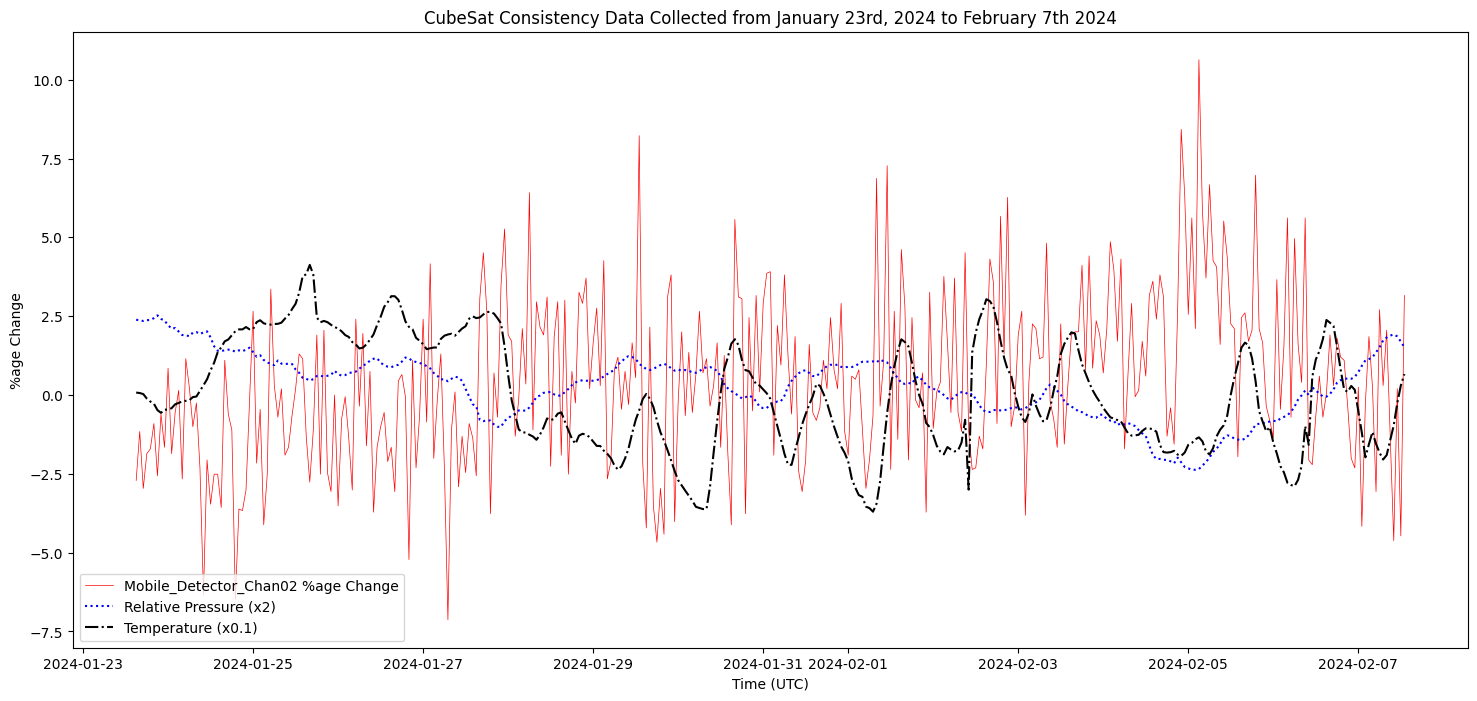

In [20]:
plt.rcParams["axes.grid"] = False
fig, (ax6) = plt.subplots(1,figsize=(18, 8))

ax6.plot(df_cubesat_updated["Chan_0_2_pct"], #marker='o', markersize=3, 
        linestyle='-', linewidth=0.5, color='red', label='Mobile_Detector_Chan02 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='blue', label='Muon002_Ch13_m_avg')
#ax6.plot(df_cubesat_updated["Chan_1_2_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='green', label='CubeSat_1_2 %age Change')
#ax6.plot(df_cubesat_updated["Chan_1_2_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='green', label='Muon002_Ch23_m_avg')
#ax6.plot(df_cubesat_updated["Chan_0_1_pct"], marker='o', markersize=3, linestyle='-', linewidth=0.5, color='red', label='CubeSat_0_1 %age Change')
#ax6.plot(df_cubesat_updated["Chan_0_1_m_avg"], marker='.', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Muon002_Ch12_m_avg')

#add ground data
#ax6.plot(df_ground_updated["Chan_0_2_pct"], #marker='.', markersize=1,          linestyle='dashed', linewidth=0.5, color='green', label='RM412_Ground_Ch02_m_avg')

#add pressure from the weather data
ax6.plot(df_combined3.index, df_combined3['Relative_Pressure_pct'], color='blue',linestyle='dotted', label='Relative Pressure (x2)')
#add temperature from the weather data
ax6.plot(df_combined3.index, df_combined3['Temperature_F_pct'], color='black',linestyle='dashdot', label='Temperature (x0.1)')

ax6.set_ylabel('%age Change')
ax6.set_xlabel('Time (UTC)')
ax6.set_title('CubeSat Consistency Data Collected from January 23rd, 2024 to February 7th 2024')
ax6.legend(loc='lower left')